In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GELKAIAQELKAIAKELKAIAWEEKAIAQG', 'GELKAIAQELKAIAKELKAIAWEEKAIAQG', 'GELKAIAQELKAIAKELKAIAWEEKAIAQG', 
             'GELKAIAQELKAIAKELKAIAWEEKAIAQG', 'GELKAIAQELKAIAKELKAIAWEEKAIAQG', 'GELKAIAQELKAIAKELKAIAWEEKAIAQG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 6),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 9.0, 1.0),
    Parameter.dynamic('Pitch', 250, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[6, 30, 9.0, 250, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	62   	-2828.32	163.441	-3157.51	-2403.02
1  	76   	-2963.32	87.4643	-3167.69	-2844.87
2  	70   	-3016.91	80.3922	-3167.69	-2907.83
3  	61   	-3067.69	74.0648	-3167.69	-2955.7 
4  	57   	-3122.09	42.9684	-3182.73	-3016.71
5  	72   	-3153.38	9.98151	-3186.84	-3130.65
6  	65   	-3163.59	6.59638	-3186.84	-3150.94
7  	55   	-3167.82	5.56971	-3186.84	-3157.97
8  	70   	-3172.47	5.6232 	-3187.38	-3165.72
9  	74   	-3178.25	5.81617	-3187.92	-3169.45
10 	54   	-3181.19	5.29397	-3188.55	-3170.49
11 	72   	-3185.64	1.97873	-3190.89	-3180.98
12 	70   	-3187.16	0.959529	-3190.89	-3185.15
13 	71   	-3187.93	0.775295	-3191.23	-3186.81
14 	56   	-3188.12	0.85004 	-3191.97	-3187.14
15 	73   	-3188.49	0.9223  	-3191.97	-3187.59
16 	64   	-3188.87	1.20074 	-3192.63	-3187.88
17 	68   	-3189.75	1.51677 	-3192.63	-3188.15
18 	72   	-3190.99	1.22906 	-3192.67	-3188.53
19 	88   	-3191.98	0.421302	-3192.7 	-3191.02
20 	84   	-3192.3 	0.221152	-3192.95	-3191.93
2

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-3193.1315369496847

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

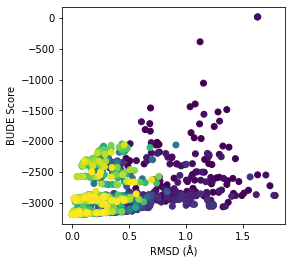

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [16]:
f = open('CC-Hex-L24E-hex-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-2675.74	285.445	-3084.46	-1877.07
1  	100  	-2833.59	182.357	-3084.46	-2142.27
2  	100  	-2919.22	105.43 	-3116.05	-2542.82
3  	100  	-2966.01	80.0517	-3116.05	-2617.8 
4  	100  	-2993.97	73.4211	-3116.05	-2629.28
5  	100  	-3019.19	48.4714	-3116.05	-2860.34
6  	100  	-3032.25	45.0046	-3116.05	-2860.34
7  	100  	-3051.91	36.9779	-3174.61	-2928.57
8  	100  	-3064.16	30.3131	-3174.61	-2998.26
9  	100  	-3073.68	26.9639	-3175.02	-3016.11
10 	100  	-3081.61	27.8145	-3175.02	-3041.21
11 	100  	-3088.38	30.6757	-3185.09	-3045   
12 	100  	-3095.78	32.5076	-3185.09	-3045   
13 	100  	-3103.36	33.2669	-3185.09	-3048.7 
14 	100  	-3112.01	36.2134	-3185.09	-3048.7 
15 	100  	-3123.55	36.5101	-3185.09	-3053.4 
16 	100  	-3133.1 	35.0751	-3186.78	-3053.4 
17 	100  	-3145.09	32.7586	-3186.78	-3069.35
18 	100  	-3155.21	28.5357	-3186.78	-3073.8 
19 	100  	-3164.19	20.9144	-3186.78	-3077.64
20 	100  	-3169.65	17.0069	-3190.57	-3108.87
21 	100  	

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-3193.2159540826165

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

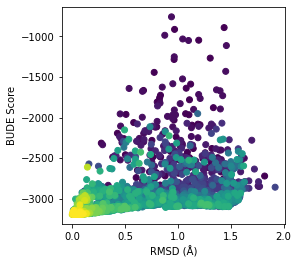

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('CC-Hex-L24E-hex-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	100  	-2621.17	432.43	-3159.78	-1194.23
1  	88   	-2600.03	422.816	-3131.42	-1439.34
2  	90   	-2793.77	309.398	-3110.15	-1499.03
3  	96   	-2637.69	402.875	-3072.66	-1356.81
4  	100  	-2634.88	496.207	-3070.47	-632.635
5  	96   	-2728.57	447.492	-3074.35	-865.291
6  	89   	-2750.17	395.49 	-3157.69	-865.291
7  	95   	-2584.31	355.007	-3130.26	-1252.08
8  	100  	-2679.51	393.438	-3106.82	-1326.54
9  	99   	-2782.49	375.409	-3130.96	-974.367
10 	87   	-2713.52	392.386	-3164.18	-974.367
11 	94   	-2552.05	423.718	-3157.29	-886.367
12 	98   	-2715.43	421.994	-3124.45	-886.367
13 	98   	-2722.4 	436.227	-3174.76	-649.826
14 	95   	-2595.93	394.653	-3065.36	-649.826
15 	95   	-2780.07	367.095	-3110.84	-1166.33
16 	96   	-2763.35	348.013	-3161.9 	-897.345
17 	93   	-2621.25	345.397	-3117.91	-1509.13
18 	89   	-2785.63	297.701	-3064.7 	-1509.13
19 	94   	-2794.81	317.563	-3076.89	-1526.35
20 	88   	-2757.32	346.925	-3071.69	-1526.35
21 	89   	-2

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-3174.7631949604256

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

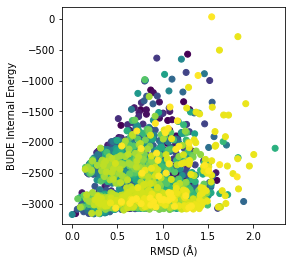

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('CC-Hex-L24E-hex-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	100  	-2623.01	359.345	-3135.6	-1710.21
1  	100  	-2801.26	263.47 	-3177.55	-1992   
2  	100  	-2931.36	157.06 	-3186.35	-2393.82
3  	100  	-2916.4 	187.178	-3171.43	-2188.39
4  	100  	-2937.45	128.802	-3178.39	-2484.6 
5  	100  	-2962.81	142.662	-3177.63	-2468.83
6  	100  	-2927.24	182.583	-3171.83	-2257.63
7  	100  	-2887.21	215.269	-3186.21	-2278.2 
8  	100  	-2957.07	169.344	-3172.59	-2274.69
9  	100  	-2922.5 	180.483	-3177.23	-2320.96
10 	100  	-2900.9 	203.381	-3182.65	-2352.75
11 	100  	-2902.6 	217.049	-3183.64	-2333.59
12 	100  	-2980.93	191.189	-3181.23	-2337.5 
13 	100  	-3044.6 	175.063	-3187.24	-2404.21
14 	100  	-3084.27	147.416	-3188   	-2569.44
15 	100  	-3126.06	113.624	-3187.78	-2611.5 
16 	100  	-3128.17	87.1753	-3191.98	-2929.37
17 	100  	-3158.74	58.9492	-3188.25	-2960.01
18 	100  	-3181.3 	12.7517	-3189.62	-3139.28
19 	100  	-3181.23	13.5847	-3189.18	-3142.38
20 	100  	-3186.7 	6.50905	-3189.9 	-3145.45
21 	100  	-3

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-3191.9815449118555

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

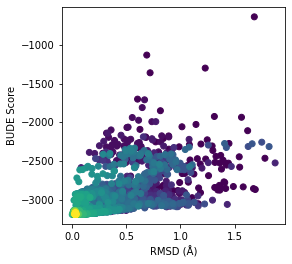

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('CC-Hex-L24E-hex-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)